<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [119]:
import pandas as pd
import numpy as np
from pathlib import Path
from clean.Cleaning import data_check
from clean.Cleaning import record
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error   
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import pickle
import warnings 
warnings.filterwarnings("ignore")

In [2]:
%load_ext autoreload
%autoreload 2

## Data exploration

In [3]:
df = pd.read_csv(r'../data/RAW/cars.csv', encoding="UTF8")

In [4]:
sum(df.duplicated(subset = 'car_ID')) == 0

True

In [5]:
df.isnull().sum()*100/df.shape[0]

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [6]:
data_check(df)

 This Df contains 0 NAN, 0 NULL and 0 dublicate line


In [7]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0]).str.upper()
ModelName = df['CarName'].apply(lambda x : ' '.join( x.split(' ')[1:]))

In [8]:
df.insert(3,"Company",CompanyName)
df.insert(4,"Model",ModelName)
df.drop(['CarName'],axis=1,inplace=True)
df['Company'].sort_values().unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'BUICK', 'CHEVROLET', 'DODGE',
       'HONDA', 'ISUZU', 'JAGUAR', 'MAXDA', 'MAZDA', 'MERCURY',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORCSHCE',
       'PORSCHE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA', 'TOYOUTA',
       'VOKSWAGEN', 'VOLKSWAGEN', 'VOLVO', 'VW'], dtype=object)

###### -> on remarque des erreurs d'appellations de compagny 

In [9]:
df['Company'] = df['Company'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
df['Company'] = df['Company'].replace(['MAXDA'], 'MAZDA')
df['Company'] = df['Company'].replace(['PORCSHCE'], 'PORSCHE')
df['Company'] = df['Company'].replace(['TOYOUTA'], 'TOYOTA')

In [10]:
df['Model'].sort_values().unique()

array(['', '100 ls', '100ls', '1131 deluxe sedan', '12tl', '144ea',
       '145e (sw)', '244dl', '245', '246', '264gl', '304', '320i', '4000',
       '411 (sw)', '5 gtl', '5000', '5000s (diesel)', '504', '504 (sw)',
       '505s turbo diesel', '604sl', '626', '99e', '99gle', '99le',
       'D-Max ', 'D-Max V-Cross', 'MU-X', 'Quadrifoglio', 'accord',
       'accord cvcc', 'accord lx', 'baja', 'boxter', 'brz', 'carina',
       'cayenne', 'celica gt', 'celica gt liftback', 'century',
       'century luxus (sw)', 'century special', 'challenger se', 'civic',
       'civic (auto)', 'civic 1300', 'civic 1500 gl', 'civic cvcc',
       'clipper', 'colt (sw)', 'colt hardtop', 'corolla', 'corolla 1200',
       'corolla 1600 (sw)', 'corolla liftback', 'corolla tercel',
       'corona', 'corona hardtop', 'corona liftback', 'corona mark ii',
       'coronet custom', 'coronet custom (sw)', 'cougar', 'cressida',
       'cricket', 'd200', 'dart custom', 'dasher', 'dayz', 'diesel', 'dl',
       'duster'

###### -> on remarque des appellations de model qui comporte des caractéristique comme ('sw', 'diesel', 'turbo', 'sedan'...)

In [11]:
df.columns

Index(['car_ID', 'symboling', 'Company', 'Model', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
df[df['Model'].str.contains('diesel')]

,car_ID,symboling,Company,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
9,10,0,AUDI,5000s (diesel),gas,turbo,two,hatchback,4wd,front,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167
114,115,0,PEUGEOT,505s turbo diesel,diesel,turbo,four,wagon,rwd,front,...,152,idi,3.70,3.52,21.0,95,4150,25,25,17075.000
199,200,-1,VOLVO,diesel,gas,turbo,four,wagon,rwd,front,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.000


In [13]:
 df[['fueltype','fuelsystem']].pivot_table(index='fueltype', columns='fuelsystem', aggfunc=len)

fuelsystem,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
fueltype,,,,,,,,
diesel,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN
gas,11.0,66.0,3.0,NaN,1.0,94.0,9.0,1.0


In [14]:
df[['fueltype','fuelsystem','compressionratio']].pivot_table(index='fueltype', values='compressionratio', columns='fuelsystem')

fuelsystem,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
fueltype,,,,,,,,
diesel,NaN,NaN,NaN,22.005,NaN,NaN,NaN,NaN
gas,9.245455,9.08803,9.4,NaN,7.0,8.803298,7.3,9.2


###### -> les voitures type diesel ont un seul fuelsysteme 'idi' et 'compressionratio' entre 7 et 9.5, on conclue q'il s'agit d'une erreur au niveau de l'appellation.
###### -> VOLVO a un model qui s'appelle diesel ou bien l'appellation de model est manquante

In [15]:
df[df['Model'].str.contains('sw')]

,car_ID,symboling,Company,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
24,25,1,DODGE,monaco (sw),gas,std,four,hatchback,fwd,front,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229.0
26,27,1,DODGE,colt (sw),gas,std,four,sedan,fwd,front,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609.0
29,30,3,DODGE,coronet custom (sw),gas,turbo,two,hatchback,fwd,front,...,156,mfi,3.60,3.90,7.0,145,5000,19,24,12964.0
68,69,-1,BUICK,century luxus (sw),diesel,turbo,four,wagon,rwd,front,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.0
109,110,0,PEUGEOT,504 (sw),gas,std,four,wagon,rwd,front,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440.0
121,122,1,PLYMOUTH,satellite custom (sw),gas,std,four,sedan,fwd,front,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692.0
154,155,0,TOYOTA,corolla 1600 (sw),gas,std,four,wagon,4wd,front,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,7898.0
186,187,2,VOLKSWAGEN,411 (sw),gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8495.0
194,195,-2,VOLVO,145e (sw),gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940.0
200,201,-1,VOLVO,145e (sw),gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0


In [16]:
df['carlength'][df['Model'].str.contains('sw')]

24     157.3
26     157.3
29     173.2
68     190.9
109    198.9
121    167.3
154    169.7
186    171.7
194    188.8
200    188.8
Name: carlength, dtype: float64

###### -> les appellations de certains model contient 'sw' ce qui contradictoir avec les données 'carbody'
###### -> une voiture sw est définie par sa longueur, on conclue qu'il s'agir d'anomalie sur les données 

In [17]:
df[df['Model'].str.contains('turbo')]

,car_ID,symboling,Company,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
74,75,1,BUICK,regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,...,304,mpfi,3.8,3.35,8.0,184,4500,14,16,45400.0
114,115,0,PEUGEOT,505s turbo diesel,diesel,turbo,four,wagon,rwd,front,...,152,idi,3.7,3.52,21.0,95,4150,25,25,17075.0


In [18]:
df[df['Model'].str.contains('hardtop')]

,car_ID,symboling,Company,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
25,26,1,DODGE,colt hardtop,gas,std,four,sedan,fwd,front,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692.0
153,154,0,TOYOTA,corona hardtop,gas,std,four,wagon,fwd,front,...,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918.0


In [19]:
df[df['Model'].str.contains('coupe')]

,car_ID,symboling,Company,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
52,53,1,MAZDA,rx2 coupe,gas,std,two,hatchback,fwd,front,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795.0
74,75,1,BUICK,regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


In [ ]:
df['Model'] = df['Model'].replace({'diesel':'', '(diesel)':'', 'sw':'', '(sw)':'', 'turbo':'','hardtop':''})

In [ ]:
df = df[df['enginelocation'].str.contains('rear')]
df = df[df['cylindernumber'].str.contains('three')]
raw = raw[(raw.cylindernumber != 'three') & (raw.cylindernumber != 'twelve')].reset_index(drop=True)
raw.loc[raw["CarName"].str.contains('diesel'), "fueltype"] = "diesel"
raw.loc[raw["CarName"].str.contains('turbo'), "aspiration"] = "turbo"
raw.loc[raw["CarName"].str.contains('"(sw)"'), "carbody"] = "wagon"
raw['enginetype'] = raw['enginetype'].replace({'dohcv':'dohc', 'ohcv': 'dohc', 'ohcf': 'dohc'})
raw['fuelsystem'] = raw['fuelsystem'].replace({'mfi':'mpfi', 'spfi': '2bbl'})
#raw_data['fueltype'] = np.where((raw_data.CarName.contains('CarName')),'diesel', raw_data.fueltype)

In [ ]:
record(df,'data_clean','CURATED')

## Analyzis

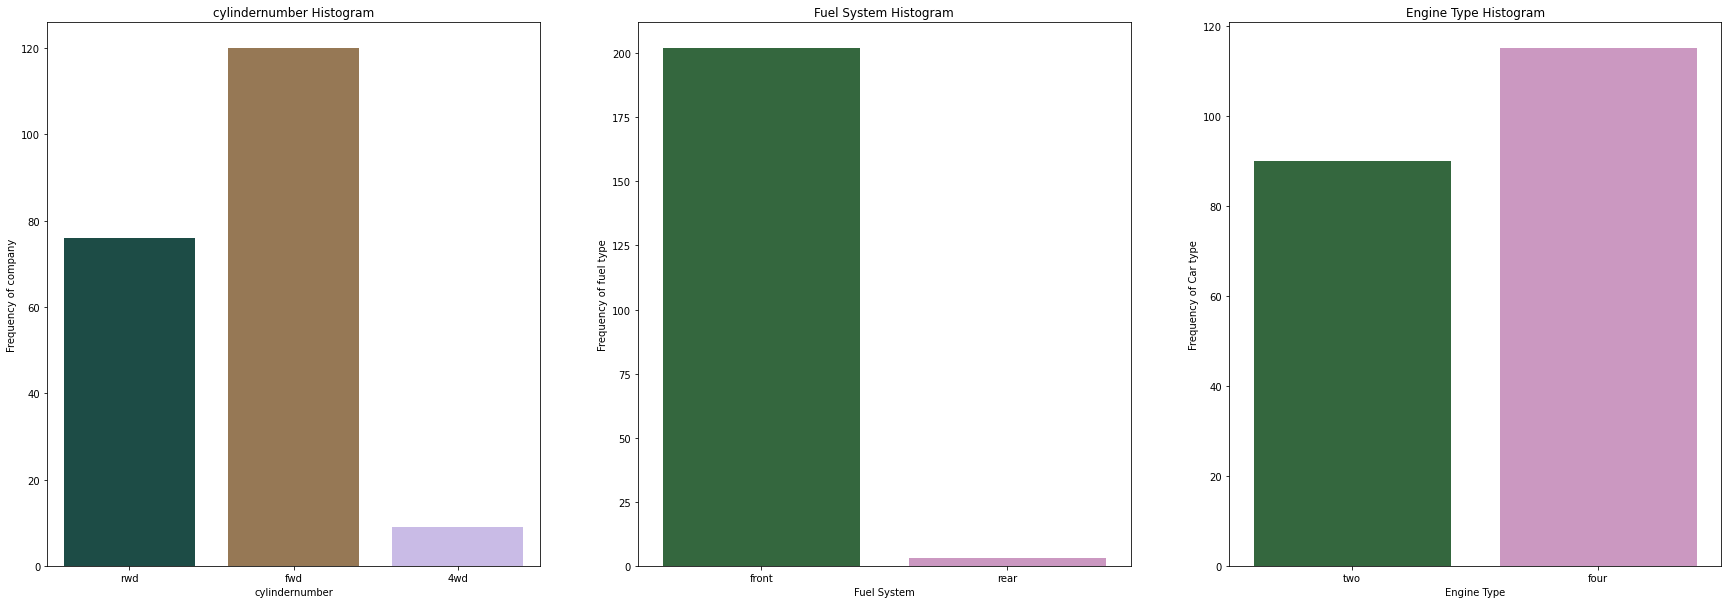

In [20]:
plt.figure(figsize=(30, 10))

plt.subplot(1,3,1)
plt1=sns.countplot(df.drivewheel, palette=("cubehelix"))
plt.title('cylindernumber Histogram')
plt1.set(xlabel = 'cylindernumber', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = sns.countplot(df.enginelocation, palette=("cubehelix"))
plt.title('Fuel System Histogram')
plt1.set(xlabel = 'Fuel System', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = sns.countplot(df.doornumber, palette=("cubehelix"))
plt.title('Engine Type Histogram')
plt1.set(xlabel = 'Engine Type', ylabel='Frequency of Car type')

plt.show()

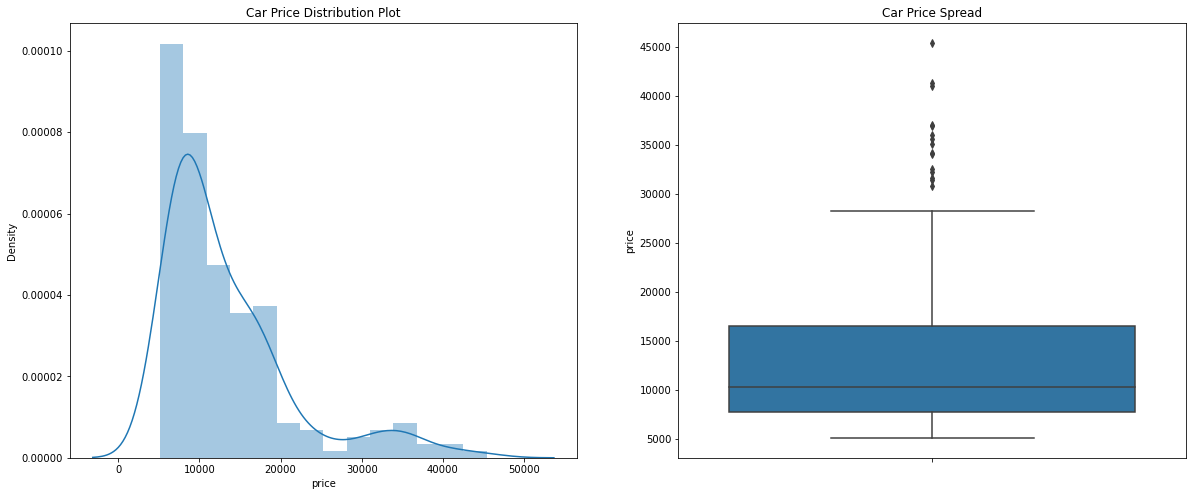

skw:
 1.7776781560914454
kur:
 3.051647871396399


In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()
print("skw:\n",df['price'].skew())
print("kur:\n",df['price'].kurtosis())

age distribution by sex and category


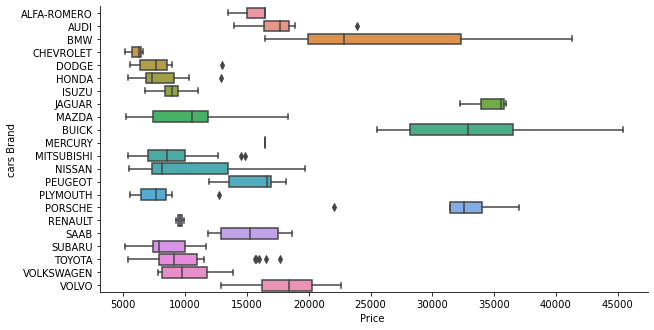

In [22]:
g = sns.catplot(y="Company", x="price", kind="box", data=df, height=4.5, aspect=2)
g.set_axis_labels("Price ", "cars Brand")
print('age distribution by sex and category')

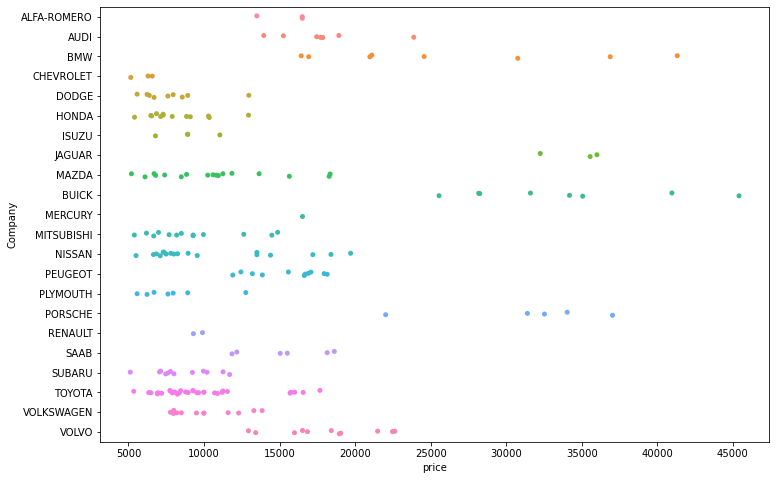

In [23]:
f, ax = plt.subplots(figsize=(12, 8))
sns.stripplot(data = df, x='price', y='Company', jitter=.1)
#plt.axvline(x=20000, color='red',ls='--')
plt.show()

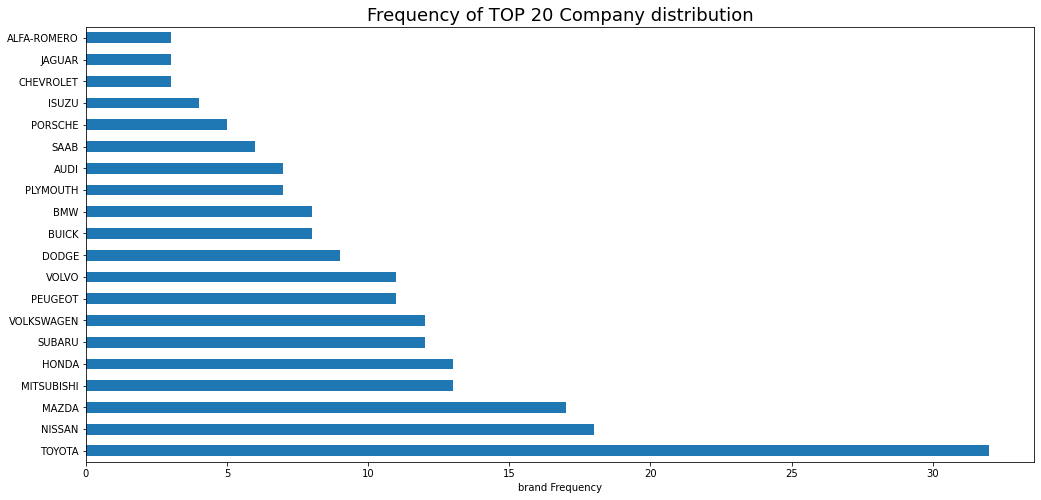

In [24]:
plt.figure(figsize=(17,8))
df.Company.value_counts().nlargest(20).plot(kind='barh')
plt.xlabel('brand Frequency')
plt.title("Frequency of TOP 20 Company distribution",fontsize=18)
plt.show()

age distribution by sex and category


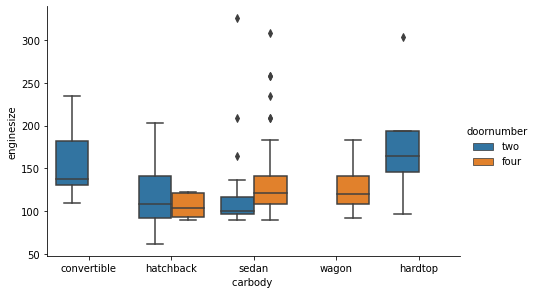

In [25]:
g = sns.catplot(y="enginesize", x="carbody", hue='doornumber', kind="box", data=df, height=4, aspect=8/5)
g.set_axis_labels("carbody ", "enginesize")
print('age distribution by sex and category')

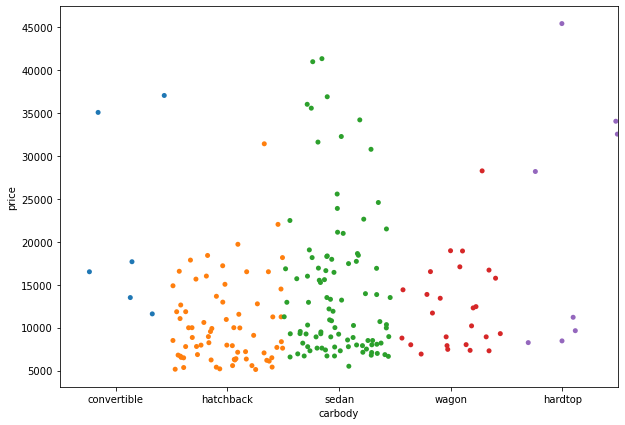

In [26]:
f, ax = plt.subplots(figsize=(10, 7))
sns.stripplot(data = df, x='carbody', y='price', jitter=.5)
plt.show()

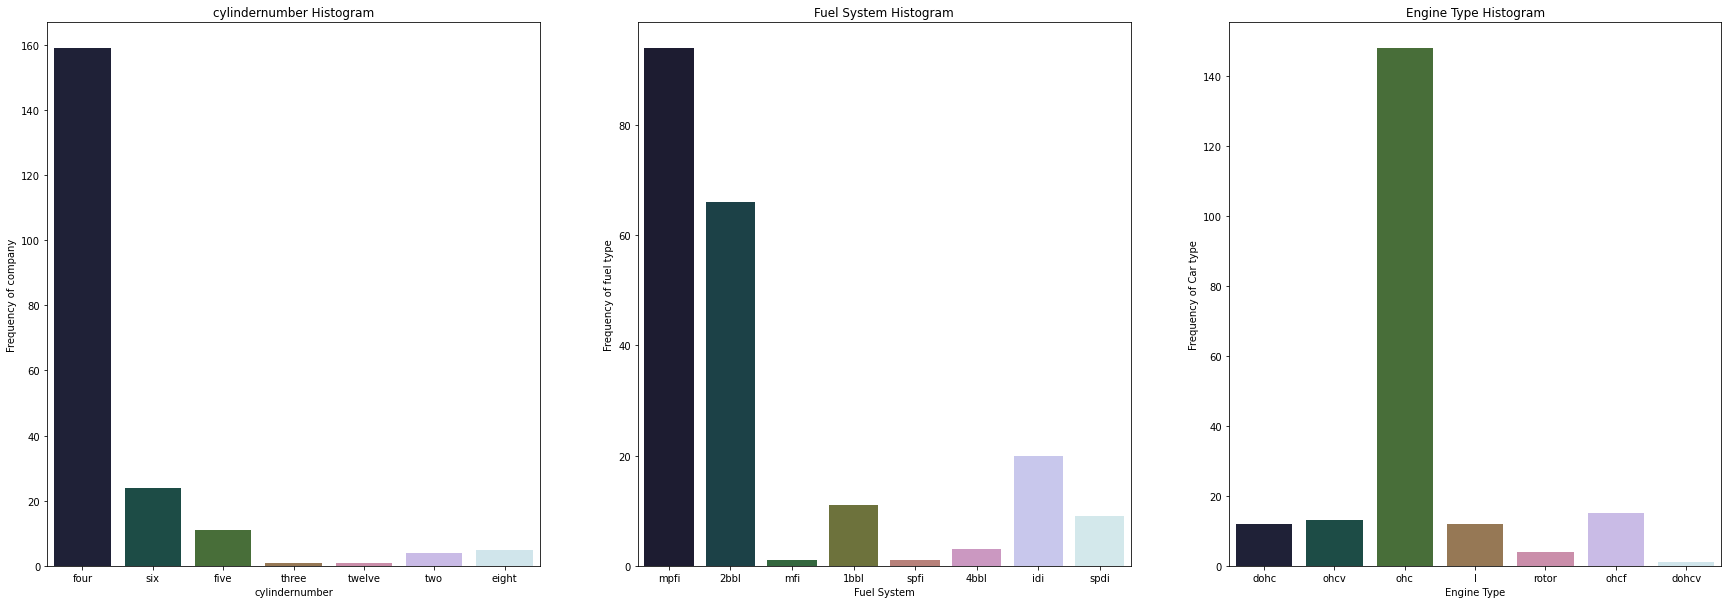

In [27]:
plt.figure(figsize=(30, 10))

plt.subplot(1,3,1)
plt1=sns.countplot(df.cylindernumber, palette=("cubehelix"))
plt.title('cylindernumber Histogram')
plt1.set(xlabel = 'cylindernumber', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = sns.countplot(df.fuelsystem, palette=("cubehelix"))
plt.title('Fuel System Histogram')
plt1.set(xlabel = 'Fuel System', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = sns.countplot(df.enginetype, palette=("cubehelix"))
plt.title('Engine Type Histogram')
plt1.set(xlabel = 'Engine Type', ylabel='Frequency of Car type')

plt.show()

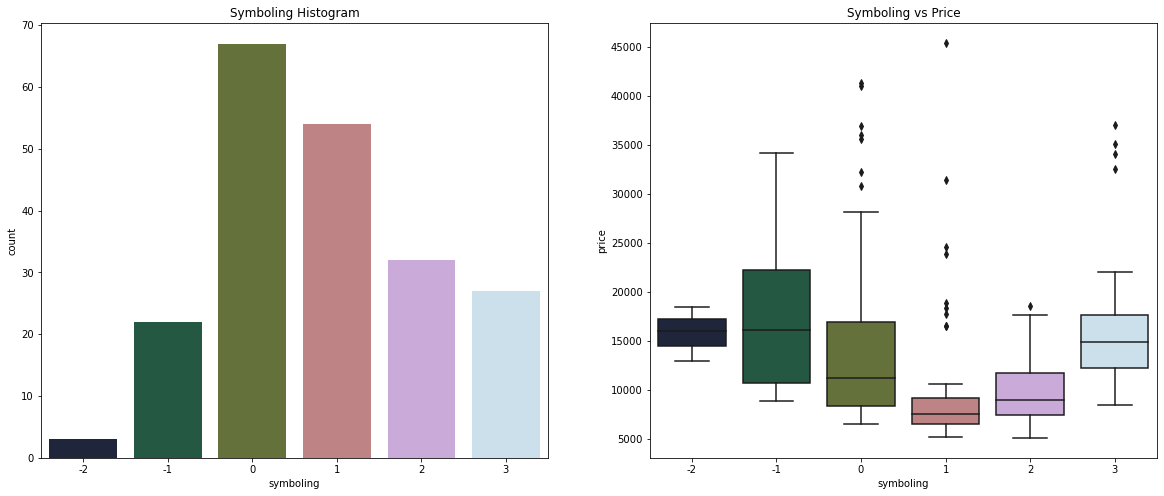

In [28]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

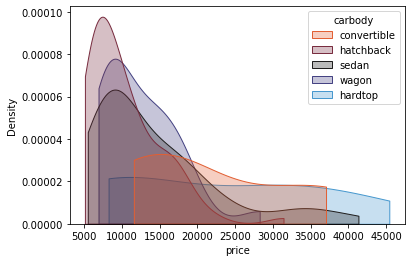

In [35]:
sns.kdeplot(data=df ,x="price", hue="carbody",cut=0 ,fill=True, palette='icefire_r',common_norm=False, alpha =0.3)

#### Averge Price & Category

In [29]:
avg_price = df.groupby(['Company'])['price'].mean().round(2).reset_index().rename(columns={'price':'avg_price'})
avg_price['category'] = avg_price['avg_price'].apply(lambda x : "Cheap" if x < 10000 else ("Medium" if 10000 <= x < 20000 else "Hight"))
avg_price

,Company,avg_price,category
0,ALFA-ROMERO,15498.33,Medium
1,AUDI,17859.17,Medium
2,BMW,26118.75,Hight
3,BUICK,33647.00,Hight
4,CHEVROLET,6007.00,Cheap
5,DODGE,7875.44,Cheap
6,HONDA,8184.69,Cheap
7,ISUZU,8916.50,Cheap
8,JAGUAR,34600.00,Hight
9,MAZDA,10652.88,Medium


## Linear regression 

####  Dummies and  scaling features

In [121]:
scalX=RobustScaler()
scaly=RobustScaler()
# Dummies of categorical variables
df_categ=df.select_dtypes(include=['object_'])
df_categ=df_categ.drop(columns=['Company','Model'])
df_encoded = pd.get_dummies(df_categ)
# Scaling numerical variables
df_num = df.select_dtypes(exclude=['object_'])
df_num=df_num.drop(columns=['car_ID','symboling'])
var=df_num.iloc[:,:-1]
tar=df_num.iloc[:,-1]
scalX.fit(var.values)
scaly.fit(tar.values.reshape(-1, 1))
df_var=pd.DataFrame(scalX.transform(var.values), columns=var.columns)
target=pd.DataFrame(scaly.transform(tar.values.reshape(-1, 1)), columns=['price'])
# concatenation
df_scale=pd.concat([df_var, target], axis = 1)
df_model = pd.concat([df_encoded, df_var], axis = 1)

<AxesSubplot:xlabel='curbweight', ylabel='price'>

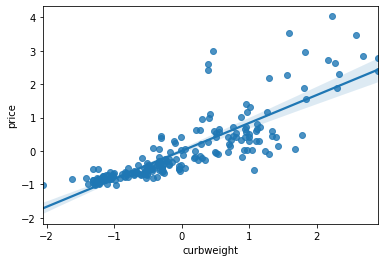

In [52]:
sns.regplot(y='price', x='curbweight', data=df_scale)

In [123]:
mod = sm.OLS(df_scale['price'], df_scale['curbweight'])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.716
Method:                 Least Squares   F-statistic:                              517.7
Date:                Wed, 22 Sep 2021   Prob (F-statistic):                    7.05e-58
Time:                        16:56:47   Log-Likelihood:                         -156.47
No. Observations:                 205   AIC:                                      314.9
Df Residuals:                     204   BIC:                                      318.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
curbweight     1.2135      0.053     22.753      0.000       1.108       1.319
==============================================================================
Omnibus:                       75.382   Durbin-Watson:                   0.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              318.970
Skew:                           1.398   Prob(JB):                     5.45e-70
Kurtosis:                       8.434   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='enginesize', ylabel='price'>

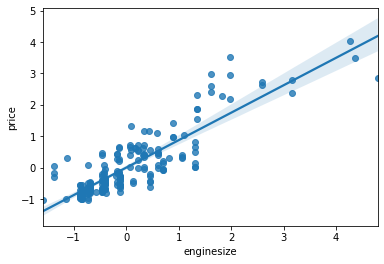

In [54]:
sns.regplot(y='price', x='enginesize', data=df_scale)

In [130]:
mod = sm.OLS(df_scale['price'], df_scale['enginesize'])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.748
Model:                            OLS   Adj. R-squared (uncentered):              0.747
Method:                 Least Squares   F-statistic:                              606.8
Date:                Wed, 22 Sep 2021   Prob (F-statistic):                    4.78e-63
Time:                        16:59:31   Log-Likelihood:                         -144.53
No. Observations:                 205   AIC:                                      291.1
Df Residuals:                     204   BIC:                                      294.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
enginesize     0.8825      0.036     24.634      0.000       0.812       0.953
==============================================================================
Omnibus:                       17.998   Durbin-Watson:                   0.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.733
Skew:                           0.550   Prob(JB):                     2.58e-06
Kurtosis:                       4.342   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
mod = sm.OLS(df_scale['price'], df_scale[['enginesize','curbweight']])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.792
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              386.9
Date:                Wed, 22 Sep 2021   Prob (F-statistic):                    5.57e-70
Time:                        16:59:26   Log-Likelihood:                         -124.94
No. Observations:                 205   AIC:                                      253.9
Df Residuals:                     203   BIC:                                      260.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
enginesize     0.5342      0.062      8.550      0.000       0.411       0.657
curbweight     0.5737      0.088      6.538      0.000       0.401       0.747
==============================================================================
Omnibus:                       33.110   Durbin-Watson:                   0.607
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.401
Skew:                           0.730   Prob(JB):                     2.57e-17
Kurtosis:                       5.611   Cond. No.                         3.79
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### X, Y train test split 

In [124]:
y=target.price
x=df_model
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 0)

In [125]:
regresseur = LinearRegression(fit_intercept=True)
regresseur.fit(X_train,y_train)

LinearRegression()

In [126]:
y_pred=regresseur.predict(X_test)
r2_score(y_test, y_pred)

0.8018570477351257

In [128]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_results['error'] = df_results['Actual'] - df_results['Predicted']
df_results['error_abs'] = df_results['error'].abs()
df_results.sort_values('error_abs', ascending=False).head(10)

,Actual,Predicted,error,error_abs
134,0.544464,2.183105,-1.638642,1.638642
18,-0.590247,-2.180664,1.590417,1.590417
16,3.559380,2.278809,1.280572,1.280572
74,4.028112,3.329102,0.699011,0.699011
136,0.901320,0.287598,0.613722,0.613722
125,1.345152,0.749512,0.595640,0.595640
111,0.606426,1.168457,-0.562031,0.562031
66,0.923580,0.380371,0.543209,0.543209
179,0.654389,1.164551,-0.510162,0.510162
30,-0.437866,-0.933594,0.495728,0.495728


In [ ]:
file = open('file.pkl','wb')
pickle.dump(regressor,file)

In [ ]:
corr = df_model.corr()
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.heatmap(abs(corr),annot=False,cmap='BrBG_r')

In [ ]:
rfe = RFE(regressor, 6)
rfe = rfe.fit(df_model.iloc[:,:-1], df_model['price'])

In [ ]:
liste = list(zip(df_model.iloc[:,:-1].columns, rfe.support_, rfe.ranking_))

In [ ]:
def tt(df,n,target) :
    rfe = RFE(regressor, n)
    rfe = rfe.fit(df.drop(columns=[target]), df[target])
    liste = list(zip(df.drop(columns=[target]).columns, rfe.support_, rfe.ranking_))
    t=[]
    for i in liste:
        if i[1]==True:
            t.append(i[0])
    return t

In [ ]:
R2=[]
for i in range(1,10):
    x=df_model[tt(df_model,i,'price')].values
    y=df_model['price'].values
    X_train, X_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 0)
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
    R2=r2_score(y_test, y_pred).round(3)
    print(R2)
    

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif
